In [7]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_graph import (
  MorseGraph, 
  color_by_position,
  attribute_cost_mat,
)
from mcopt.optimal_transport import (
  GW, fGW,
  color_transfer,
  color_transfer_expected_color
)

# Load Morse Complex

In [8]:
mc = load_complex('../gen_data/complex')
mc_noisy = load_complex('../gen_data/complex_noisy')

# Construct Morse Graph

In [9]:
mg = MorseGraph.from_complex(mc).sample(5, mode='geo_dist')

mg_noisy = MorseGraph.from_complex(mc_noisy).sample(5, mode='geo_dist')

## Initial Graphs

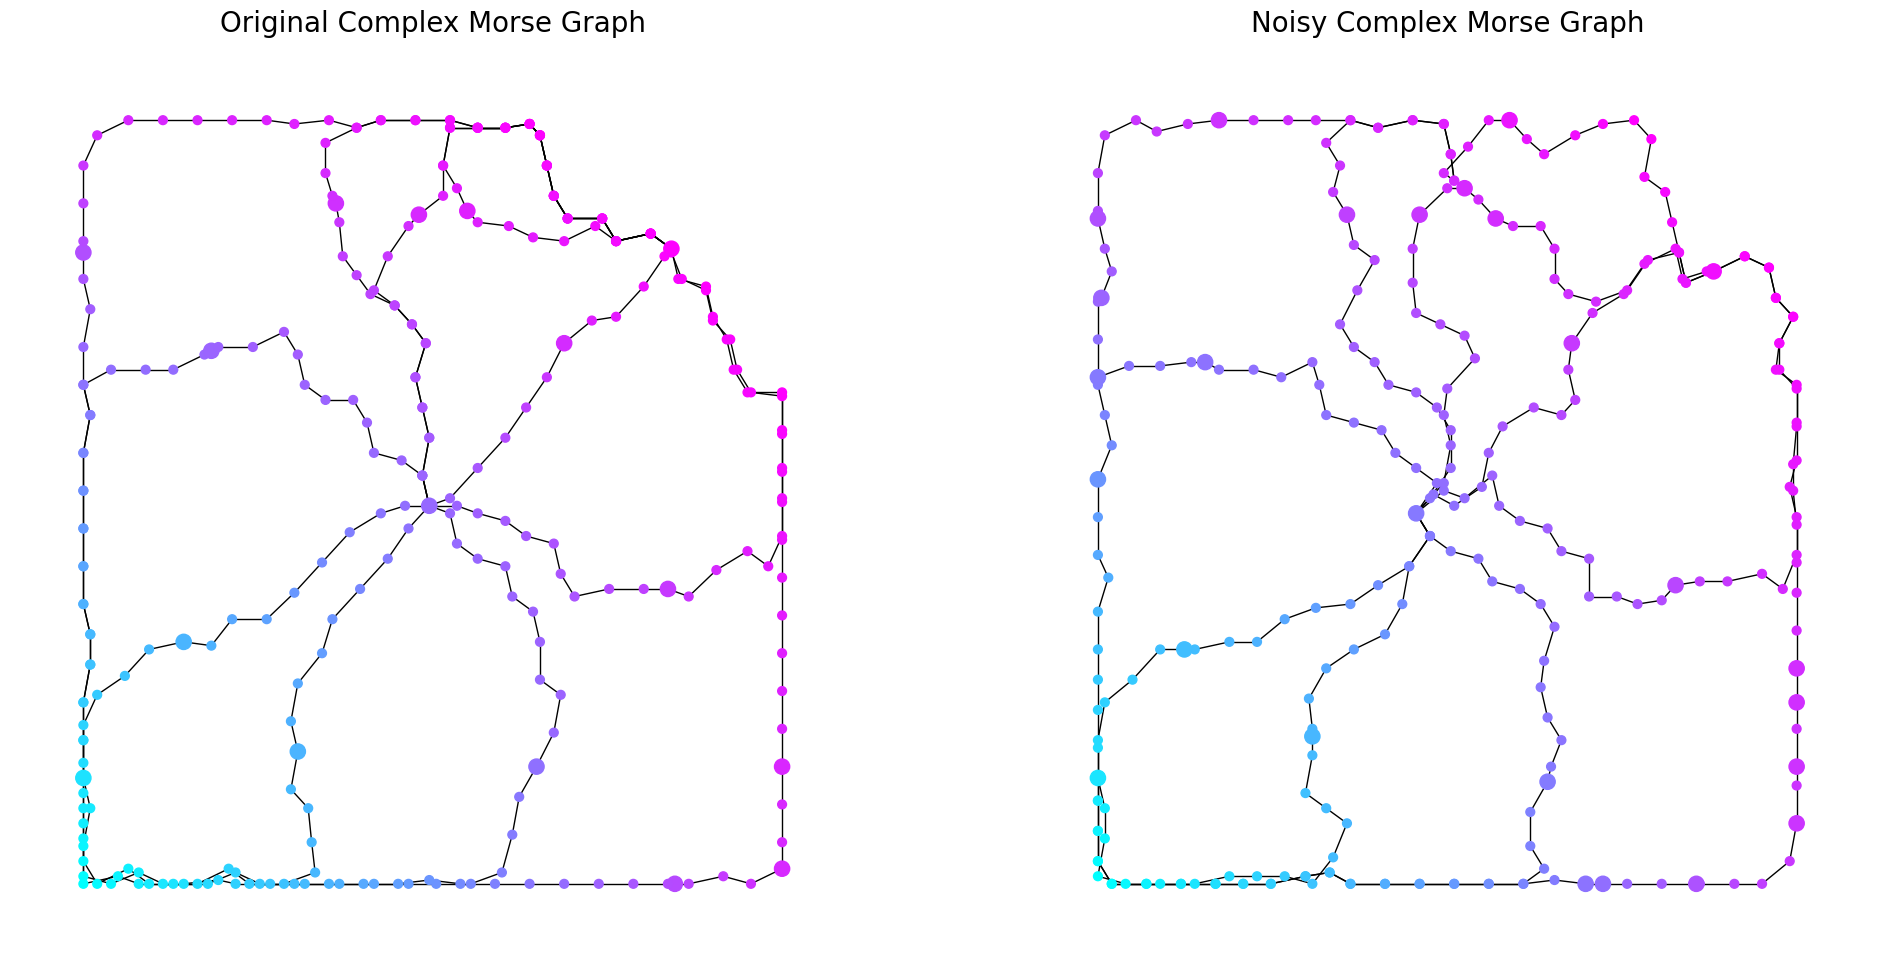

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axis[0], node_size=40, cmap=cmap)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(ax=axis[1], node_size=40, cmap=cmap)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()

# Run Gromov-Wasserstein Optimal Transport

In [23]:
weight_modes = ['path_length', 'geo_dist', 'adj']
hist_modes = ['unif', 'deg']

cmap = 'cool'

mg_node_color = color_by_position(mg)

In [31]:
couplings = {}

for hist in hist_modes:
  couplings[hist] = {}
  
  for weight in weight_modes:
    
    mg_net = mg.to_measure_network(weight=weight, hist=hist)
    mg_noisy_net = mg_noisy.to_measure_network(weight=weight, hist=hist)

    coupling, log = GW(mg_net, mg_noisy_net, log=True)
    dist = log['gw_dist']
    
    print(f'weight={weight}, hist={hist} produced distance {dist}')
    
    mg_noisy_node_color = color_transfer(
      mg_net, 
      mg_noisy_net, 
      coupling,
      mg_node_color, 
    )
    
    couplings[hist][weight] = {
      # 'net': mg_noisy_net,
      'coupling': coupling,
      'colors': mg_noisy_node_color
    }


weight=path_length, hist=unif produced distance 26.619135220683827
weight=geo_dist, hist=unif produced distance 361.9123884339669
weight=adj, hist=unif produced distance 0.003546131935821907
weight=path_length, hist=deg produced distance 34.125996681679915
weight=geo_dist, hist=deg produced distance 372.12235148251096
weight=adj, hist=deg produced distance 0.0036949315836779933


AttributeError: 'int' object has no attribute 'items'

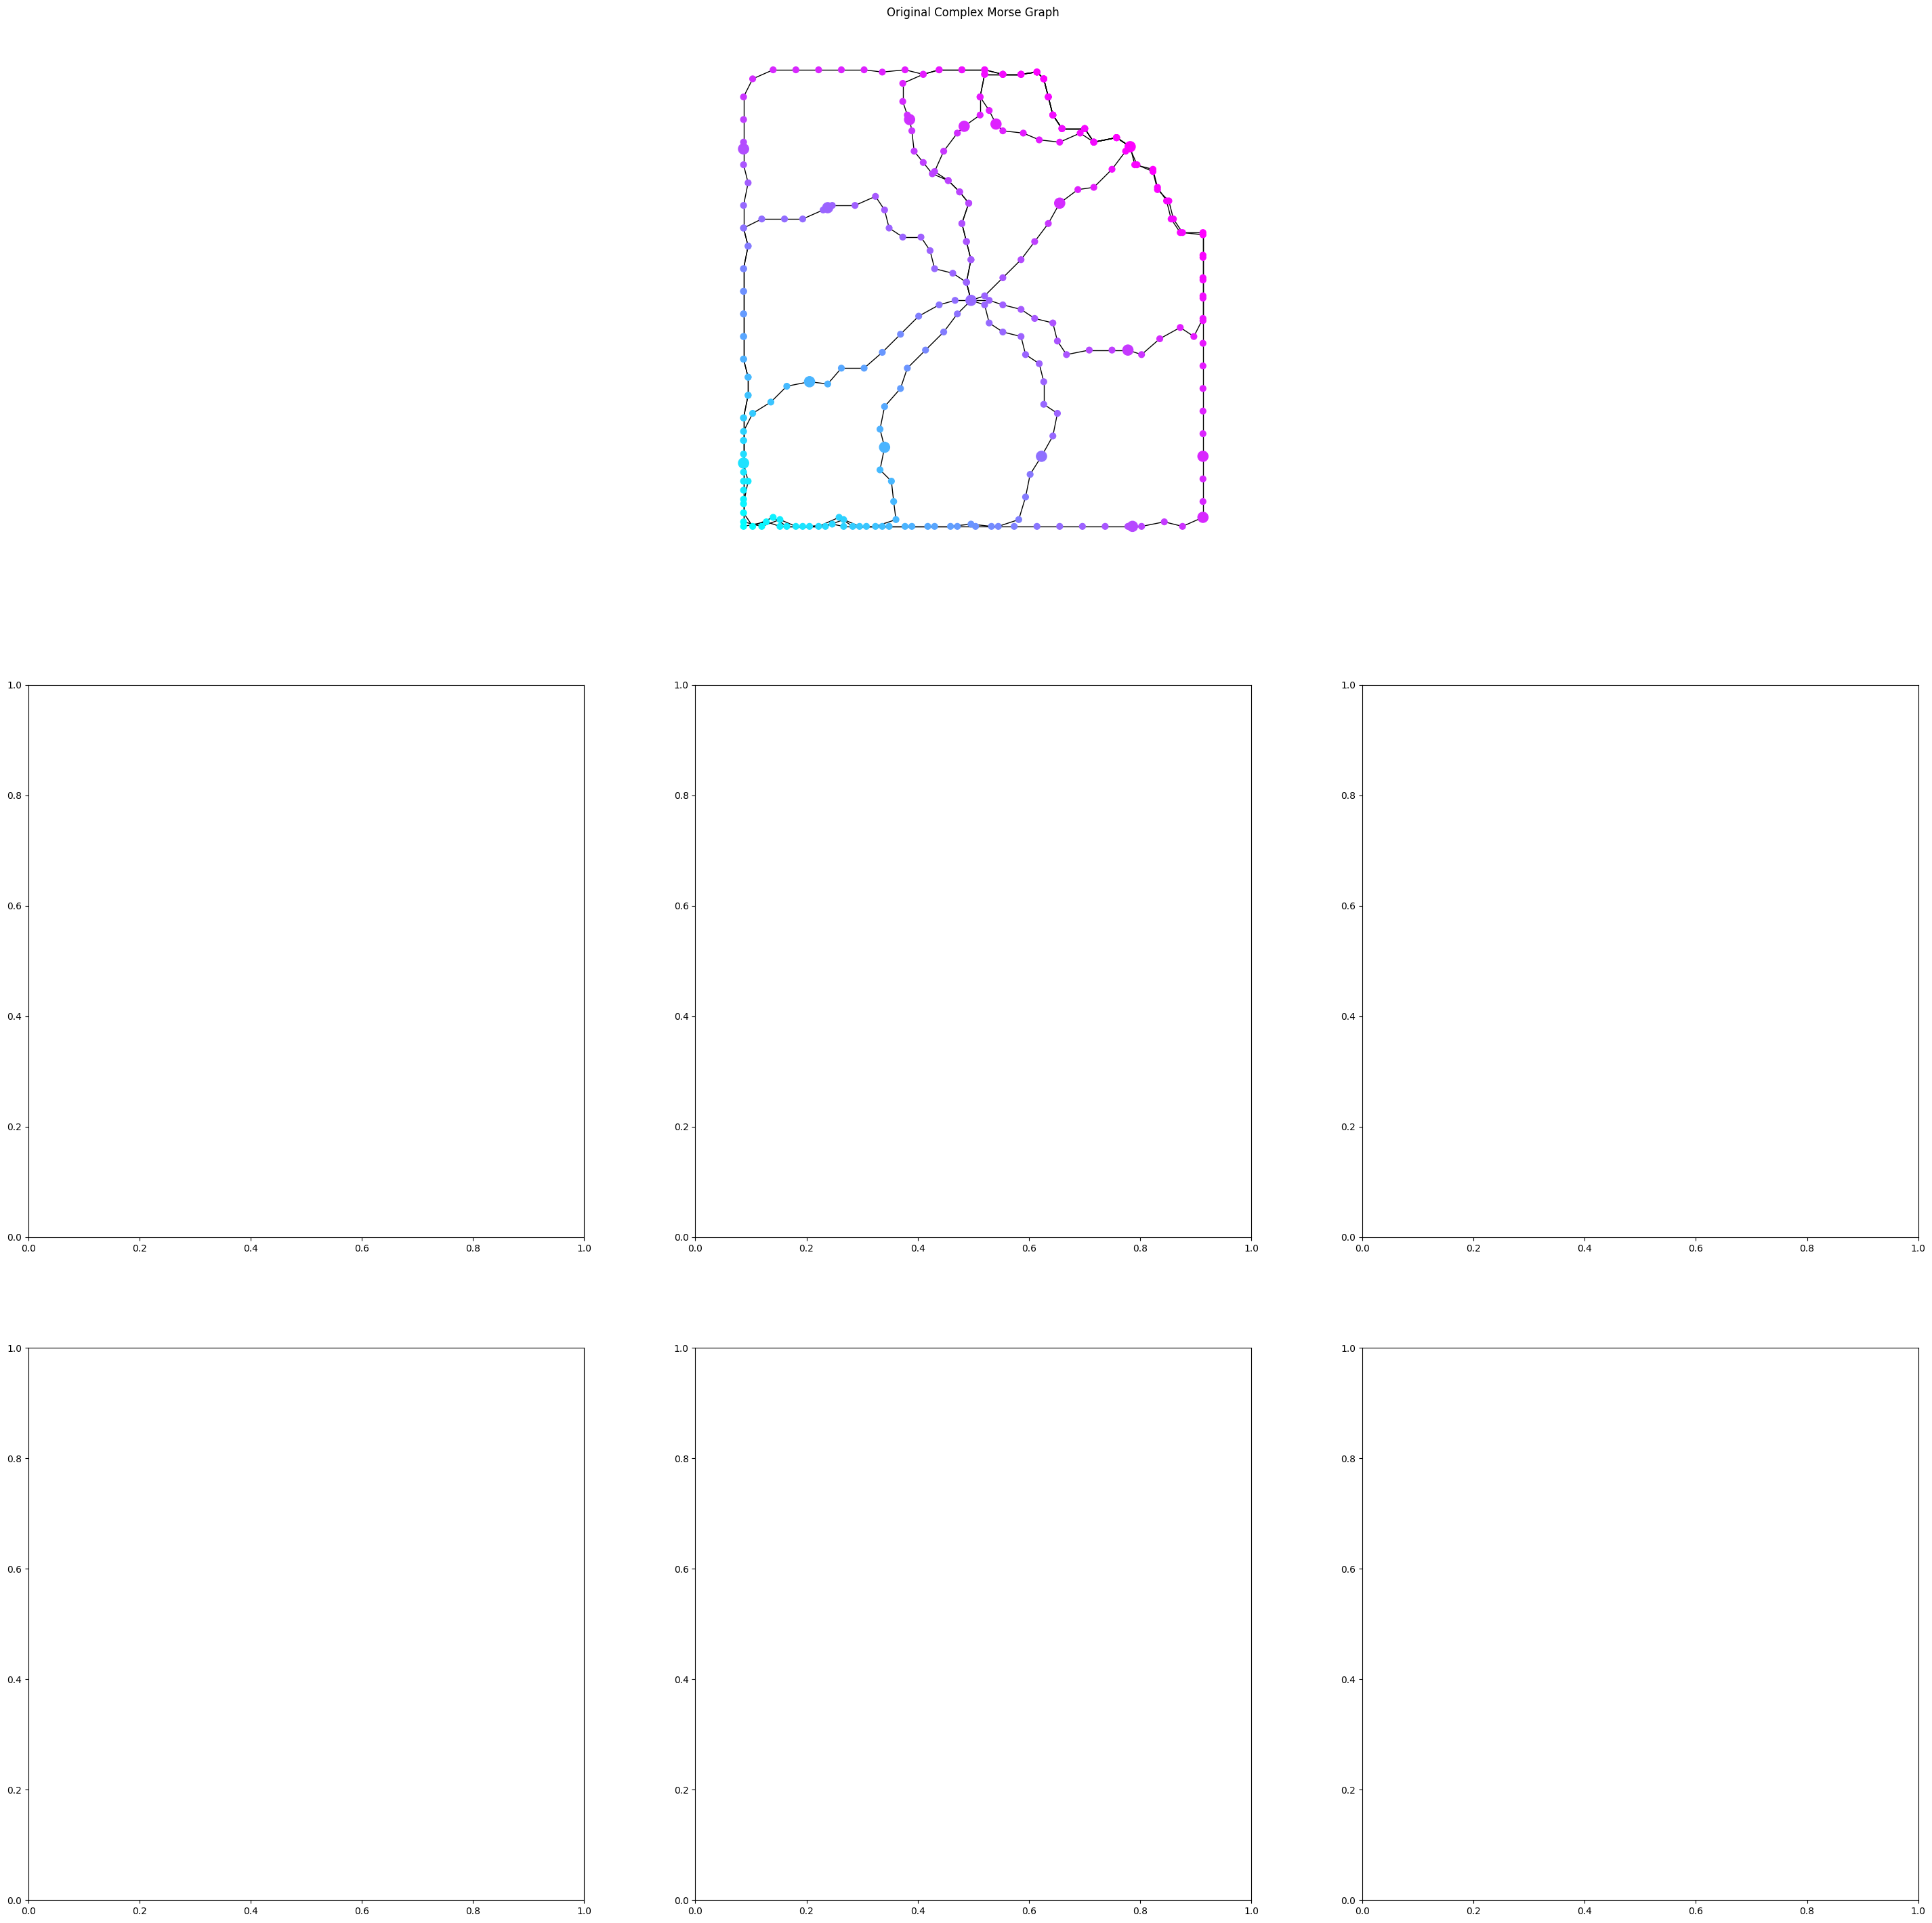

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(36, 36))

fontsize=30

axes[0,0].axis('off')
axes[0,2].axis('off')

mg.draw(
  ax=axes[0,1],
  node_size=40,
  node_color=mg_node_color,
  cmap=cmap
)
axes[0,1].set_title('Original Complex Morse Graph', fontsize=fontsize)


mg_noisy.draw(
  ax=axes[1,0],
  node_size=40,
  node_color=couplings['unif']['adj']['colors'],
  cmap=cmap
)
axes[1,0].set_title('Uniform Distribution + Adjacency Matrix', fontsize=fontsize)

mg_noisy.draw(
  ax=axes[1,1],
  node_size=40,
  node_color=couplings['unif']['path_length']['colors'],
  cmap=cmap
)
axes[1,1].set_title('Uniform Distribution + Path Length Matrix', fontsize=fontsize)

mg_noisy.draw(
  ax=axes[1,2],
  node_size=40,
  node_color=couplings['unif']['geo_dist']['colors'],
  cmap=cmap
)
axes[1,2].set_title('Uniform Distribution + Geodesic Length Matrix', fontsize=fontsize)


mg_noisy.draw(
  ax=axes[2,0],
  node_size=40,
  node_color=couplings['deg']['adj']['colors'],
  cmap=cmap
)
axes[2,0].set_title('Degree Distribution + Adjacency Matrix', fontsize=fontsize)

mg_noisy.draw(
  ax=axes[2,1],
  node_size=40,
  node_color=couplings['deg']['path_length']['colors'],
  cmap=cmap
)
axes[2,1].set_title('Degree Distribution + Path Length Matrix', fontsize=fontsize)

mg_noisy.draw(
  ax=axes[2,2],
  node_size=40,
  node_color=couplings['deg']['geo_dist']['colors'],
  cmap=cmap
)
axes[2,2].set_title('Degree Distribution + Geodesic Length Matrix', fontsize=fontsize)
